<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/advanced-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-1-1.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Introduction to Deep Learning

## What is a Neural Network

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. 

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

<!--
<div>
<img src='../07-pictures/03_intro_to_deep_learning_pic_0.png'  width="600">
</div>
-->
![caption](./pic/chapter-5-1_pic_0.png)

Neural networks rely on **training data** to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

## Mc Culloch and Pitts Artificial Neuron

The McCulloch and Pitts neuron is one of the oldest neural network. It has a single neuron and is the simplest form of a neural network. So it is very important to learn how it works because it is the most fundamental unit of a deep neural networks. 

The artificial neuron receives one or more inputs and sums them to produce an output. Usually each input is separately weighted, and the sum is passed through a non-linear function known as an activation function or transfer function. The transfer functions usually have a sigmoid shape, but they may also take the form of other non-linear functions, piecewise linear functions, or step functions. They are also often monotonically increasing, continuous, differentiable and bounded. 

<!--
<div>
<img src='../07-pictures/1_5_intro_deep_learning_pic_0.png'  width="600">
</div>
-->
![caption](./pic/chapter-5-1_pic_1.png)

## Feedforward Neural Networks

Feedforward neural networks, or multi-layer perceptrons (MLPs), are what we’ve primarily been focusing on within this notebook. They are comprised of an input layer, a hidden layer or layers, and an output layer. Data usually is fed into these models to train them, and they are the foundation for computer vision, natural language processing, and other neural networks. 

The  simplest kind of feedforward neural network is a single-layer network, which consists of a single layer of output nodes; the inputs are fed directly to the outputs via a series of weights. The sum of the products of the weights and the inputs is calculated in each node, and if the value is above some threshold the neuron fires and takes the activated value; otherwise it takes the deactivated value. 

In the following we are going to implement a very simple neural network from scratch without any library. In my opinion this is very usefull because most people consider neural networks as a black-box and use libraries like Keras, TensorFlow and PyTorch which provide, among other things, automatic differentiation without a real understanding of how a neural network really works. Though it is not necessary to write your own code on how to compute gradients and backprop errors, having knowledge on it helps you in understanding a few concepts which can help you a lot in understanding how a neural networks works..

### One Hidden Layer NN

We will build a shallow dense neural network with one hidden layer

![caption](./pic/chapter-5-1_pic_2.png)

Where in the graph above, we have a input vector $x = (x_1, x_2)$, containing 2 features and 4 hidden nodes $a_1, a_2, a_3$ and $a_4$, and only one value in output $y_1 \in [0, 1]$ (consider this a binary classification task with a prediction of probability)

In each hidden unit, take $a_1$ as example, a linear operation followed by an activation function, $f$, is performed. So given input $x = (x_1, x_2)$, inside node $a_1$, we have:

$$z_1 = w_{11}x_1 + w_{12}x_2 + b_1$$

$$a_1 = f(w_{11}x_1 + w_{12}x_2 + b_1) = f(z_1) $$

Here $w_{11}$ denotes weight 1 of node 1, $w_{12}$ denotes weight 2 of node 1. Same for node $a_2$, it would have:

$$z_2 = w_{21}x_1 + w_{22}x_2 + b_2$$

$$a_2  = f(w_{21}x_1 + w_{22}x_2 + b_2) = f(z_2)$$

And same for $a_3$ and $a_4$ and so on ...

We can also write in a more compact form

\begin{equation}
\begin{pmatrix}
z_1 \\ z_2 \\ z_3 \\ z_4
\end{pmatrix} =
\begin{pmatrix}
w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \\ w_{41} & w_{42}
\end{pmatrix} 
\cdot 
\begin{pmatrix}
x_1 \\ x_2 
\end{pmatrix}
+
\begin{pmatrix}
b_1 \\ b_2 \\ b_3 \\ b_4
\end{pmatrix} 
\Rightarrow Z^{[1]} = W^{[1]} \cdot X + B^{[1]} 
\end{equation}

Note that superscript $[i]$ denotes the $ith$ layer. Let's assume that the first activation function is the $\tanh$ and the output activation function is the $sigmoid$. So the result of the hidden layer is:

$$ A^{[1]} = \tanh{Z^{[1]}} $$

This result is applied to the output node which will perform another linear operation with a different set of weights, $W^{[2]}$:

$$ Z^{[2]} = W^{[2]} \cdot A^{[1]} + B^{[2]} $$

and the final output will be the result of the application of the output node activation function (the sigmoid) to this value:

$$ \hat{y} = \sigma({Z^{[2]}})$$

For the dimension of each matrix, we have:

- $ W^{[1]}$ in the case above would have dimension $4 \times 2$, with each $ith$ row is the weight of node $i$
- $B^{[1]}$ has dimension $4 \times 1$
- $Z^{[1]}$ and $A^{[1]}$ both have dimention $4 \times 1$
- $W^{[2]}$ has dimension $1 \times 4$
- consequently, $Z^{[2]}$ and $A^{[2]}$ would have dimensition $1 \times 1$, which is a single value

Function $\tanh$ and $sigmoid$ looks as below.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0.5, 1.0, 'tanh')

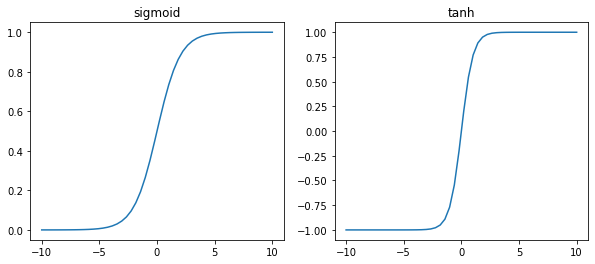

In [3]:
plt.figure(figsize=[10, 4])
x = np.linspace(-10, 10)

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('sigmoid')

plt.subplot(1, 2, 2)
plt.plot(x, tanh(x))
plt.title('tanh')

Notice that the only difference of these functions is the scale of y

### The Loss Function
 
Remember that Linear regression uses Least Squared Error as loss function that gives a convex graph and then we can complete the optimization by finding its vertex as global minimum. However, it’s not an option for logistic regression anymore. Since the hypothesis is changed, Least Squared Error will result in a non-convex graph with local minimums by calculating with sigmoid function applied on raw model output.

<!--
<div>
<img src='../07-pictures/3-hidden-nn.png'  width="600">
</div>
-->
![caption](./pic/chapter-5-1_pic_3.png)

Furthermore using logistic regression, means that we are focusing on binary classification, we have class 0 and class 1. To compare with the target, we want to constrain predictions to some values between 0 and 1. That’s why Sigmoid Function is applied on the raw model output and provides the ability to predict with probability. So will follow a different path. 

Intuitively, we want to assign more punishment when predicting 1 while the actual is 0 and when predict 0 while the actual is 1. The loss function of logistic regression is doing this exactly which is called Logistic Loss. If y = 1,  when prediction = 1, the cost must be = 0, otherwise, when prediction = 0, the learning algorithm is punished by a very large cost. Similarly, if y = 0, predicting 0 has no punishment but predicting 1 has a large value of cost. In formula we have

\begin{equation}
L(y, \hat{y}) = 
\begin{cases} 
-\log{\hat{y}} & \text{when}\, y = 1 \\ -\log(1 - \hat{y}) & \text{when}\, y = 0 
\end{cases} 
\end{equation}

Another advantage of this loss function is that although we are looking at it by y = 1 and y = 0 separately, it can be written as one single formula which brings convenience for calculation:

$$ L(y, \hat{y}) = -[y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}] $$

### Formula of Batch Training
 
The above shows the formula of a single input vector, however in actual training processes, a batch is trained instead of 1 at a time. The change applied in the formula is trivial, we just need to replace the single vector $x$ with a matrix $X$ with size $n \times m$, where $n$ is number of features and $m$ is the the batch size, samples are stacked column wise, and the following result matrix are applied likewise. We have the same formulas as before ... 

$$ Z^{[1]} = W^{[1]}X + b^{[1]}  $$

$$ A^{[1]} = \tanh{Z^{[1]}}  $$

$$ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}  $$

$$ \hat{Y} = A^{[2]} = \sigma({Z^{[2]}})  $$

$$ J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i}^{m}L(y^{(i)}, \hat{y}^{(i)})  $$

... but for the dimension of each matrix taken in this example now we have:

- $X$ has dimension $2 \times m$, as here there are 2 features and $m$ is the batch size
- $W^{[1]}$ in the case above would have dimension $4 \times 2$, with each $ith$ row is the weight of node $i$
- $b^{[1]}$ has dimension $4 \times 1$
- $Z^{[1]}$ and $A^{[1]}$ both have dimension $4 \times m$
- $W^{[2]}$ has dimension $1 \times 4$
- consequently, $Z^{[2]}$ and $A^{[2]}$ would have dimension $1 \times m$

Also the loss function is the same as logistic regression, but for batch training, we'll take the average loss for all training samples.

This is all for the forward propagation. To activate our neurons to learn, we need to get derivative of weight parameters and update them use gradient descent.

But now it is enough for us to implement the forward propagation first.

### Generate Sample Dataset
 
Scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity. Here we generate a simple **binary classification task** with 5000 data points and 20 features for later model validation.

In [4]:
from sklearn import datasets

# Signature of make_classification
# 
# make_classification (
# n_samples: int=100,
# n_features: int=20,
# n_informative: int=2,
# n_redundant: int=2,
# n_repeated: int=0,
# n_classes: int=2,
# n_clusters_per_class: int=2,
# weights: __class__=None,
# flip_y: float=0.01,
# class_sep: float=1,
# hypercube: bool=True,
# shift: float=0,
# scale: float=1,
# shuffle: bool=True,
# random_state: __class__=None
# )

X, y = datasets.make_classification(n_samples=5000, random_state=123)

X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]

print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (4000, 20)
test shape (1000, 20)


In [5]:
print(X[0])

[ 0.72613439 -0.09447897 -0.40795222  0.89879088  0.10474933 -1.66342926
 -0.72927498  0.10438512  1.56349884  0.28581615  1.15799916 -0.15592708
  0.82470152 -1.19743807  0.68883271 -1.50530988  0.93842871  0.38021827
 -0.66238809  0.43334625]


In [6]:
print(y[0])

1


In [7]:
#plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, edgecolor='k')

### Weights Initialization
 
Our neural network has 1 hidden layer and 2 layers in total(hidden layer + output layer), so there are 4 weight matrices to initialize ($W^{[1]}, b^{[1]}$ and $W^{[2]}, b^{[2]}$). Notice that the weights are initialized relatively small so that the gradients would be higher thus learning faster in the beginning phase.

In [8]:
def init_weights(n_input, n_hidden, n_output):
    params = {}
    params['W1'] = np.random.randn(n_hidden, n_input) * 0.01
    params['b1'] = np.zeros((n_hidden, 1))
    params['W2'] = np.random.randn(n_output, n_hidden) * 0.01
    params['b2'] = np.zeros((n_output, 1))
    
    return params

In [9]:
params = init_weights(20, 10, 1)

print('W1 shape', params['W1'].shape)
print('b1 shape', params['b1'].shape)
print('W2 shape', params['W2'].shape)
print('b2 shape', params['b2'].shape)

W1 shape (10, 20)
b1 shape (10, 1)
W2 shape (1, 10)
b2 shape (1, 1)


### Forward Propagation

Let's implement the forward process following equations $(5) \sim (8)$.

In [10]:
def forward(X, params):
    """
    X: need to have shape (n_features x m_samples)
    """
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    A0 = X
    
    cache = {}
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache['Z1'] = Z1
    cache['A1'] = A1
    cache['Z2'] = Z2
    cache['A2'] = A2
    return  cache

In [11]:
# get 100 samples
inp = X[:100].T

cache = forward(inp, params)

print('Z1 shape', cache['Z1'].shape)
print('A1 shape', cache['A1'].shape)
print('Z2 shape', cache['Z2'].shape)
print('A2 shape', cache['A2'].shape)

Z1 shape (10, 100)
A1 shape (10, 100)
Z2 shape (1, 100)
A2 shape (1, 100)


### Loss Function

Following equation $(9)$, let's calculate the loss of each batch.

In [12]:
def loss(Y, Y_hat):
    """
    Y: vector of true value
    Y_hat: vector of predicted value
    """
    assert Y.shape[0] == 1
    assert Y.shape == Y_hat.shape
    m = Y.shape[1]
    s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
    loss = -np.sum(s) / m
    return loss

In [13]:
Y = np.array([np.random.choice([0, 1]) for i in range(10)]).reshape(1, -1)
Y_hat = np.random.uniform(0, 1, 10).reshape(1, -1)

l = loss(Y, Y_hat)
print(f'loss {l}')

loss 0.8034269665652178


### Delta Rule

Now it comes to the so colled ***delta rule*** which is the key to our weights update. With *delta rule* we compute the gradient of the loss function with respect to the weights of the network for a single input–output example.

Given a generic actual value $y$, we want to minimize the loss $L$, and the technic we are going to apply here is gradient descent, basically what we need to do is to apply derivative to our variables and move them slightly down to the optimum. Here we have 2 variables, $W$ and $b$, and for this example, the update formula of them would be:

$$W_{new} = W_{old} - \frac{\partial L}{\partial W} \Rightarrow \Delta W = - \frac{\partial L}{\partial W}$$

$$b_{new} = b_{old} - \frac{\partial L}{\partial b} \Rightarrow \Delta b = - \frac{\partial L}{\partial b}$$

The delta rule algorithm works by computing the gradient of the loss function with respect to each weight. In order to get the derivative of our targets, chain rules would be applied:
 
 $$\frac{\partial L}{\partial W} =  \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial Z} \frac{\partial Z}{\partial W} $$

$$\frac{\partial L}{\partial b} =  \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial Z} \frac{\partial Z}{\partial b} $$

Let's calculate ...

#### Gradient Calculation

$$L(y, \hat{y}) = -[y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}] \Rightarrow 
\frac{\partial L}{\partial \hat y} = -\frac{y}{\hat y} + \frac{1-y}{1-\hat y} = \frac{\hat y - y}{\hat y(1 - \hat y)}$$

$$ Z = W^{[i]} \cdot x^{[i]} + B^{[i]} \Rightarrow \frac{\partial Z}{\partial W} = x \quad \frac{\partial Z}{\partial b} = 1$$


We have to compute the derivatives of the activation functions (see appendix for details):

**Hidden Layer Activation Function (Hyperbolic Tangent)**

\begin{equation}
\tanh x = \frac{{{e^x} – {e^{ – x}}}}{{{e^x} + {e^{ – x}}}} 
\Rightarrow 
\frac{d}{{dx}}\tanh x =  1 - {\left(\tanh x \right)}^2 
\end{equation}

**Output Layer Activation Function (Sigmoid Function)** 

\begin{equation}
\sigma(x) =  \left[ \dfrac{1}{1 + e^{-x}} \right]  \Rightarrow
\dfrac{d}{dx} \sigma(x) =  \sigma(x) \cdot (1 - \sigma(x))
\end{equation}

Given the loss function $L$ we defined above, we have gradients as follows:

**Output Layer**

\begin{align}
& \frac{\partial L}{\partial \hat y} = \frac{\hat y - y}{\hat y(1 - \hat y)} \notag\\
& \frac{\partial Z}{\partial W_O} = x \notag\\
& \frac{\partial \hat y}{\partial Z} = \frac{\partial \sigma}{\partial Z} = \sigma(Z) \cdot (1 - \sigma(Z)) = (\hat y) (1 - \hat y)
\end{align}

So the complete gradient is:

\begin{align}
& \frac{\partial L}{\partial W_O} =  \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial Z} \frac{\partial Z}{\partial W_O} = (\hat y - y) \cdot x \notag\\
& \frac{\partial L}{\partial b} =  (\hat y - y)
\end{align}

**Hidden Layer**

Now we have to calculate

$$\frac{\partial Z}{\partial W_H}$$

Remember that

$$Z = W_O \cdot tanh\left( W_H \cdot X + b_H \right) + b_O$$

and

$$\frac{\partial Z}{\partial W_H} = W_O \cdot \frac{\partial \, tanh(\dots)}{\partial W_H} \cdot X = W_O \cdot \left( 1 - tanh^2(\dots) \right) \cdot X$$

and finally

\begin{equation}
\frac{\partial L}{\partial W_H} = (\hat y - y) \cdot W_O \cdot X \cdot \left( 1 - tanh^2(\dots) \right)
\end{equation}

#### Weights Update

Now we can compute changes in weight matrices

**Output Layer**

\begin{align}
& \Delta W^{[2]} = \frac{1}{m}\left[A^{[2]} - Y \right]A^{[1]^T} = \frac{1}{m}\Delta^{[2]}A^{[1]^T} \\
& \Delta b^{[2]} = \frac{1}{m}np.sum(dZ^{[2]}, axis=1, keepdims=True) 
\end{align}

**Hidden Layer**

\begin{align}
\Delta W^{[1]} &= \frac{1}{m} \left[ A^{[2]} - Y \right] \cdot  X^{T} \cdot W^{[2]T} \cdot (1 - A^{[1]^2}) \notag\\
         &= \frac{1}{m} \Delta^{[2]} \cdot W^{[2]T} \cdot (1 - A^{[1]^2}) \cdot  X^{T}   \notag\\
         &= \frac{1}{m} \Delta^{[1]} \cdot  X^{T} 
\end{align}

\begin{equation} 
\Delta b^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis=1, keepdims=True)  
\end{equation}

where

\begin{align} 
& \Delta^{[2]} = A^{[2]} - Y  \\
& \Delta^{[1]} = \Delta^{[2]} \cdot W^{[2]T} \cdot (1 - A^{[1]^2})
\end{align}

In summary:

- Error is calculated between the expected outputs and the outputs forward propagated from the network.
- These errors are then propagated backward through the network from the output layer to the hidden layer, assigning a penalty for the error and updating weights as they go.

<!--
<div>
<img src='../07-pictures/backpropagation_pseudo_code.png'  width="600">
</div>
-->
![caption](./pic/chapter-5-1_pic_4.png)


In equation $(4)$ is element-wise multiplication, and the gradient of $\tanh{x}$ is $1 - x^2$. You can try to deduct the equation above by yourself, but I basically took it from internet.

Let's break down the shape of each element, given number of each layer equals `(n_x, n_h, n_y)` and batch size equals `m`:

- $A^{[2]}$, $Y$ and $dZ^{[2]}$ has shape `(n_y, m)`
- Because $A^{[1]}$ has shape `(n_h, m)`, $dW^{[2]}$ would have shape `(n_y, n_h)`
- $db^{[2]}$ has shape `(n_y, 1)`

- Because $dZ^{[2]}$ has shape `(n_y, m)`, $W^{[2]}$ has shape`(n_y, n_h)`, $dZ^{[1]}$ would have shape `(n_h, m)`
- In equation $(5)$, $X$ has shape `(n_x, m)`, so $dW^{[1]}$ has shape `(n_h, n_x)`
- $db^{[1]}$ has shape `(n_h, 1)`


Once we understand the formula, implementation should come with ease.

In [14]:
def backward(params, cache, X, Y):
    """
    [From coursera deep-learning course]
    params: we initiate above with W1, b1, W2, b2
    cache: the intermediate caculation we saved with Z1, A1, Z2, A2
    X: shape of (n_x, m)
    Y: shape (n_y, m)
    """
    
    m = X.shape[1]

    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    DL2 = A2 - Y
    dW2 = (1 / m) * np.dot(DL2, A1.T)
    db2 = (1 / m) * np.sum(DL2, axis=1, keepdims=True)
    DL1 = np.multiply(np.dot(W2.T, DL2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(DL1, X.T)
    db1 = (1 / m) * np.sum(DL1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

### Batch Loader

Now let's ensemble everything into a class.

In [15]:
class ShallowNN:
    def __init__(self, n_input, n_hidden, n_output):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.params = {}
        self.cache = {}
        self.grads = {}
        
    def compute_loss(self, Y, Y_hat):
        """
        Y: vector of true value
        Y_hat: vector of predicted value
        """
        assert Y.shape[0] == 1
        assert Y.shape == Y_hat.shape
        m = Y.shape[1]
        s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
        loss = -np.sum(s) / m
        return loss
    
    
    def init_weights(self):
        self.params['W1'] = np.random.randn(self.n_hidden, self.n_input) * 0.01
        self.params['b1'] = np.zeros((self.n_hidden, 1))
        self.params['W2'] = np.random.randn(self.n_output, self.n_hidden) * 0.01
        self.params['b2'] = np.zeros((self.n_output, 1))
    
    
    def forward(self, X):
        """
        X: need to have shape (n_features x m_samples)
        """
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        self.cache['Z1'] = Z1
        self.cache['A1'] = A1
        self.cache['Z2'] = Z2
        self.cache['A2'] = A2
     
    
    def backward(self, X, Y):
        """
        [From coursera deep-learning course]
        params: we initiate above with W1, b1, W2, b2
        cache: the intermediate caculation we saved with Z1, A1, Z2, A2
        X: shape of (n_x, m)
        Y: shape (n_y, m)
        """

        m = X.shape[1]

        W1 = self.params['W1']
        W2 = self.params['W2']
        A1 = self.cache['A1']
        A2 = self.cache['A2']

        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {"dW1": dW1,
                      "db1": db1,
                      "dW2": dW2,
                      "db2": db2}

        
    def get_batch_indices(self, X_train, batch_size):
        n = X_train.shape[0]
        indices = [range(i, i+batch_size) for i in range(0, n, batch_size)]
        return indices
    
    
    def update_weights(self, lr):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        dW1, db1, dW2, db2 = self.grads['dW1'], self.grads['db1'], self.grads['dW2'], self.grads['db2']
        self.params['W1'] -= dW1
        self.params['W2'] -= dW2
        self.params['b1'] -= db1
        self.params['b2'] -= db2
    
    
    def fit(self, X_train, y_train, batch_size=32, n_iterations=100, lr=0.01):
        self.init_weights()
        
        indices = self.get_batch_indices(X_train, batch_size)
        for i in range(n_iterations):
            for ind in indices:
                X = X_train[ind, :].T
                Y = y_train[ind].reshape(1, batch_size)
                
                self.forward(X)
                self.backward(X, Y)
                self.update_weights(lr)
            
            if i % 10 == 0:
                Y_hat = self.cache['A2']
                loss = self.compute_loss(Y, Y_hat)
                print(f'iteration {i}: loss {loss}')
            
            
    def predict(self, X):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        return A2

    
def accuracy(Y, Y_pred):
    """
    Y: vector of true value
    Y_pred: vector of predicted value
    """
    def _to_binary(x):
        return 1 if x > .5 else 0

    assert Y.shape[0] == 1
    assert Y.shape == Y_pred.shape
    Y_pred = np.vectorize(_to_binary)(Y_pred)
    acc = float(np.dot(Y, Y_pred.T) + np.dot(1 - Y, 1 - Y_pred.T))/Y.size
    return acc

In [16]:
model = ShallowNN(20, 10, 1)

In [17]:
model.fit(X_train, y_train, batch_size=100, n_iterations=300, lr=0.01)

iteration 0: loss 0.197620506717178
iteration 10: loss 0.08937462790948
iteration 20: loss 0.07480382862701461
iteration 30: loss 0.07467645572471696
iteration 40: loss 0.0772999125260534
iteration 50: loss 0.07936548040862235
iteration 60: loss 0.07655370155290261
iteration 70: loss 0.06809174336119242
iteration 80: loss 0.06296206353377837
iteration 90: loss 0.05870092385908955
iteration 100: loss 0.05514167996494381
iteration 110: loss 0.052168964818675355
iteration 120: loss 0.04918689366402596
iteration 130: loss 0.04643650456875267
iteration 140: loss 0.0439257939188753
iteration 150: loss 0.042134587868880455
iteration 160: loss 0.04031809532924452
iteration 170: loss 0.03835653672105061
iteration 180: loss 0.03728107693400866
iteration 190: loss 0.03805461489268815
iteration 200: loss 0.03789202397897539
iteration 210: loss 0.03778062022769864
iteration 220: loss 0.037616549025940776
iteration 230: loss 0.03740063883774698
iteration 240: loss 0.03715642270129356
iteration 250: 

In [18]:
y_preds = model.predict(X_test.T)

acc = accuracy(y_test.reshape(1, -1), y_preds)
print(f'accuracy: {acc*100}%')

accuracy: 93.7%


## Keras: the Python Deep Learning API

In this chapter we will present the code samples found in Chapter 2, Section 1 of **Deep Learning with Python** by François Chollet the creator of ***Keras***.

***Keras*** is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. Its documentation (or specification) is available at https://keras.io. It was developed by ***François Chollet*** as part of a research project and released as an open source project in March 2015. It quickly gained popularity owing to its ease-of-use, flexibility and beautiful design. To perform the heavy computations required by neural networks, keras-team relies on a computation backend. At the present, you can choose from three popular open source deep learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK) or Theano.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

<!--
<div>
<img src='../07-pictures/MINST_1.png'  width="600">
</div>
-->
![caption](./pic/chapter-5-1_pic_5.PNG)

In [19]:
import keras

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [20]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

In [26]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [27]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Let’s go through this code line by line:

- The first line creates a Sequential model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.

- Next, we build the first layer and add it to the model. It is ***Dense*** hidden layer with 512 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes 

$$\phi \left( Z^{[1]} = W^{[1]} \cdot X + B^{[1]} \right), \quad \phi(z) = \textit{ReLU}(z)$$

- Finally, we add a Dense output layer with 10 neurons (one per class). Using a 10-way "softmax" layer means that it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [28]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 512 connection weights, plus 512 bias terms, which adds up to
401920 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data. We will come back to this later.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

see [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) for a description of rmsprop and [here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) for crossentropy, note that for a binary classification, where the number of classes M equals 2, cross-entropy is exactly the loss function of the previous example.

In [29]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [30]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels:

In [31]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**What is an epoch?**

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large). Some people use the term iteration loosely and refer to putting one batch through the model as an iteration.   

If the batch size is the whole training dataset then the number of epochs is the number of iterations. For practical reasons, this is usually not the case. Many models are created with more than one epoch. The general relation where dataset size is d, number of epochs is e, number of iterations is i, and batch size is b would be d*e = i*b. 

Determining how many epochs a model should run to train is based on many parameters related to both the data itself and the goal of the model, and while there have been efforts to turn this process into an algorithm, often a deep understanding of the data itself is indispensable.

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [32]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4260 - accuracy: 0.8783
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1111 - accuracy: 0.9673
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0706 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0489 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0347 - accuracy: 0.9893


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9779


In [34]:
print('test_acc:', test_acc)

test_acc: 0.9779000282287598


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

In [35]:
X = np.concatenate((train_images, test_images))
Y = np.concatenate((train_labels, test_labels))
print(X.shape, Y.shape)

(70000, 784) (70000, 10)


In [36]:
history = network.fit(X, Y, validation_split=0.33, epochs=5, verbose=1)

Epoch 1/5
1466/1466 [==============================] - 15s 10ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0604 - val_accuracy: 0.9831
Epoch 2/5
1466/1466 [==============================] - 15s 10ms/step - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0650 - val_accuracy: 0.9827
Epoch 3/5
1466/1466 [==============================] - 16s 11ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0718 - val_accuracy: 0.9827
Epoch 4/5
1466/1466 [==============================] - 15s 10ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0724 - val_accuracy: 0.9837
Epoch 5/5
1466/1466 [==============================] - 15s 10ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0885 - val_accuracy: 0.9807


In [37]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


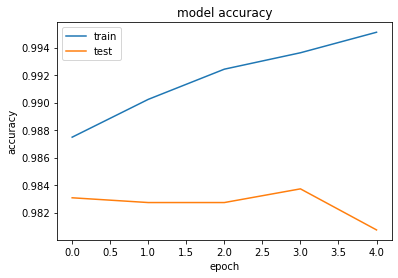

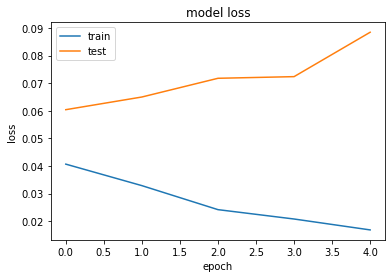

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This concludes our very first example: you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code. 

## Other types of Neural Networks

Convolutional neural networks (CNNs) are similar to feedforward networks, but they’re usually utilized for image recognition, pattern recognition, and/or computer vision. These networks harness principles from linear algebra, particularly matrix multiplication, to identify patterns within an image.

Recurrent neural networks (RNNs) are identified by their feedback loops. These learning algorithms are primarily leveraged when using time-series data to make predictions about future outcomes, such as stock market predictions or sales forecasting.

## Appendix - Calculation of Activation Functions Derivatives

### Derivative of the Hyperbolic Tangent

$$\frac{d}{{dx}}\tanh x = \frac{d}{{dx}}\left( {\frac{{{e^x} – {e^{ – x}}}}{{{e^x} + {e^{ – x}}}}} \right)
= \frac{{\left( {{e^x} + {e^{ – x}}} \right)\frac{d}{{dx}}\left( {{e^x} – {e^{ – x}}} \right) – \left( {{e^x} + {e^{ – x}}} \right)\frac{d}{{dx}}\left( {{e^x} – {e^{ – x}}} \right)}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}}$$

\begin{equation}
\begin{gathered} \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{{\left( {{e^x} + {e^{ – x}}} \right)\left( {{e^x} + {e^{ – x}}} \right) – \left( {{e^x} + {e^{ – x}}} \right)\left( {{e^x} + {e^{ – x}}} \right)}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2} – {{\left( {{e^x} + {e^{ – x}}} \right)}^2}}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{{\left( {{e^{2x}} + {e^{ – 2x}} + 2{e^x}{e^{ – x}}} \right) – \left( {{e^{2x}} + {e^{ – 2x}} – 2{e^x}{e^{ – x}}} \right)}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{{\left( {{e^{2x}} + {e^{ – 2x}} + 2} \right) – \left( {{e^{2x}} + {e^{ – 2x}} – 2} \right)}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{{{e^{2x}} + {e^{ – 2x}} + 2 – {e^{2x}} – {e^{ – 2x}} + 2}}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = \frac{4}{{{{\left( {{e^x} + {e^{ – x}}} \right)}^2}}} \\ \Rightarrow \frac{d}{{dx}}\left( {\tanh x} \right) = 1 - {\left( {\frac{e^x - e^{-x}}{{{e^x} + {e^{ – x}}}}} \right)^2} = 1 - {\left(\tanh x \right)}^2 \\ \end{gathered}
\end{equation}


### Derivative of the Sigmoid

\begin{align*}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \notag \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \notag\\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \notag\\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \notag\\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \notag\\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \notag\\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \notag\\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \notag\\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align*}

## References and Credits 

***Chollet F.***, "*Deep Learning with Python*" Manning (2018)

***Jeremy Z.***, "*Build a Shallow Neural Network*" click [here](https://towardsdatascience.com/building-a-shallow-neural-network-a4e2728441e0)  for the original post.